In [257]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [258]:
train_data = pd.read_csv('./emnist-letters-train.csv')
train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
train_data.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,...,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [260]:
train_data = np.array(train_data)
random.shuffle(train_data)
train_data = pd.DataFrame(train_data)

In [262]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
X_train = train_data.drop(0, axis=1)
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
y_train = train_data[0]

In [267]:
len(y_train.unique())

26

### This dataset is really bad so we have to rotate and then flip the image array to see the true letter.

In [268]:
modified_data: list[cv2.Mat] = []
for image_array in X_train.iloc:
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)
    # plt.imshow(image, cmap="gray_r")
    # cv2.imshow("Image", image)
    # cv2.waitKey(0)

modified_array = np.array(modified_data)

In [269]:
np.save('modified_array', modified_array)

In [270]:
X_train: np.ndarray = np.load('./modified_array.npy')
X_train.shape

(88799, 28, 28)

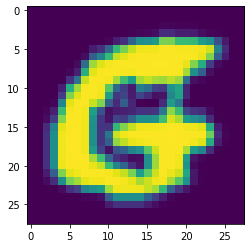

In [271]:
plt.imshow(X_train[0])

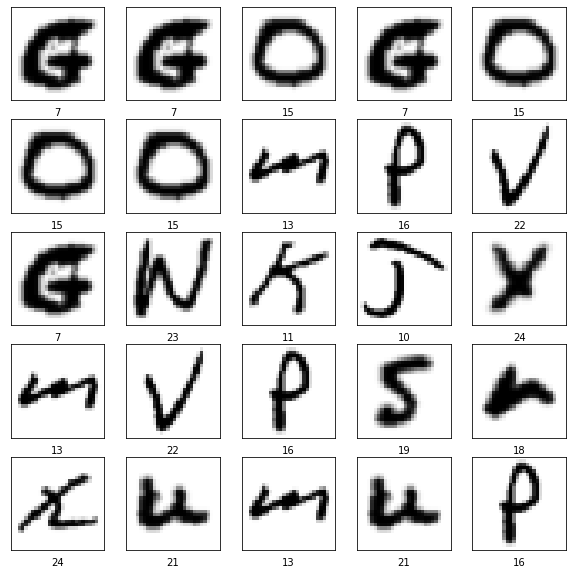

In [272]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [273]:
X_train[0].shape

(28, 28)

Normalization is decreasing the accuracy

In [274]:
# X_train = tf.keras.utils.normalize(X_train, axis=1)
# X_train.shape

In [358]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(8, 8),filters=128, input_shape=(28, 28, 1), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(4, 4), filters=64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(27, activation='softmax')
])

In [359]:
model.compile(
        optimizer=tf.keras.optimizers.SGD(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
)

In [360]:
history = model.fit(X_train, y_train, epochs=8, validation_split = 0.2)

Epoch 1/8
2220/2220 [==============================] - 175s 78ms/step - loss: 0.6473 - accuracy: 0.8103 - val_loss: 0.3907 - val_accuracy: 0.8762
Epoch 2/8
2220/2220 [==============================] - 161s 72ms/step - loss: 0.2929 - accuracy: 0.9069 - val_loss: 0.2959 - val_accuracy: 0.9057
Epoch 3/8
2220/2220 [==============================] - 123s 56ms/step - loss: 0.2233 - accuracy: 0.9259 - val_loss: 0.2662 - val_accuracy: 0.9153
Epoch 4/8
2220/2220 [==============================] - 134s 60ms/step - loss: 0.1841 - accuracy: 0.9386 - val_loss: 0.2319 - val_accuracy: 0.9249
Epoch 5/8
2220/2220 [==============================] - 133s 60ms/step - loss: 0.1577 - accuracy: 0.9474 - val_loss: 0.2192 - val_accuracy: 0.9287
Epoch 6/8
2220/2220 [==============================] - 135s 61ms/step - loss: 0.1369 - accuracy: 0.9535 - val_loss: 0.2127 - val_accuracy: 0.9309
Epoch 7/8
2220/2220 [==============================] - 139s 63ms/step - loss: 0.1220 - accuracy: 0.9591 - val_loss: 0.2052 -

In [361]:
model.save('./saved_models/ocr_convnet_softmax_shuffled_sgd')

INFO:tensorflow:Assets written to: ./saved_models/ocr_convnet_softmax_shuffled_sgd\assets


INFO:tensorflow:Assets written to: ./saved_models/ocr_convnet_softmax_shuffled_sgd\assets


In [362]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
3,0.184131,0.938569,0.231878,0.924944,3
4,0.157666,0.947367,0.219152,0.928660,4
5,0.136934,0.953476,0.212739,0.930912,5
6,0.122001,0.959079,0.205240,0.934347,6
7,0.110889,0.962387,0.199311,0.933953,7


In [363]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

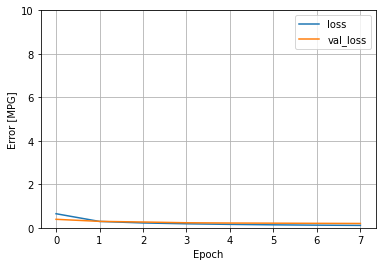

In [364]:
plot_loss(history)

In [365]:
test_data = pd.read_csv('./emnist-letters-test.csv')
test_data.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
test_data.describe()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
count,14799.000000,14799.0,14799.0,14799.0,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,...,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0
mean,9.757348,0.0,0.0,0.0,0.0,0.000878,0.024123,0.044665,0.018717,0.020677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.344262,0.0,0.0,0.0,0.0,0.106863,1.413602,2.611553,1.100437,1.238699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.000000,0.0,0.0,0.0,0.0,13.000000,108.000000,208.000000,106.000000,126.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [367]:
X_test = test_data.drop('1', axis=1)
y_test = test_data['1']

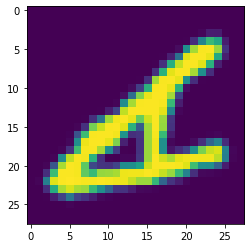

In [368]:
image = X_test.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(image)

In [369]:
modified_data: list[cv2.Mat] = []
for cnt, image_array in enumerate(X_test.iloc):
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)

modified_array = np.array(modified_data)

In [370]:
np.save('modified_array2', modified_array)

In [371]:
X_test: np.ndarray = np.load('./modified_array2.npy')
X_test[0].shape

(28, 28)

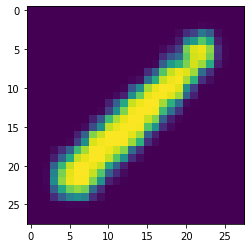

In [372]:
plt.imshow(X_test[8999])

In [405]:
new_model = tf.keras.models.load_model('./saved_models/ocr_convnet_softmax_shuffled_sgd')


In [406]:
evaluation = new_model.evaluate(X_test, y_test)
evaluation

463/463 [==============================] - 5s 11ms/step - loss: 0.3171 - accuracy: 0.8976


[0.31707054376602173, 0.8976282477378845]

In [407]:
pred: np.ndarray = new_model.predict(X_test)

463/463 [==============================] - 7s 16ms/step


In [408]:
pred[8999]

array([8.61183196e-07, 1.79719882e-05, 8.55324402e-07, 1.11371344e-04,
       2.12298733e-06, 1.55599281e-07, 1.12965899e-05, 1.08224663e-06,
       1.51328923e-05, 2.84919813e-02, 2.14132527e-03, 1.61741092e-08,
       9.68050420e-01, 9.24858853e-07, 6.58071731e-05, 1.48203893e-04,
       1.47333834e-04, 3.00588624e-07, 2.10084581e-05, 5.19791047e-06,
       3.48662652e-05, 6.49197148e-07, 4.84330871e-04, 3.82711907e-09,
       1.69386965e-07, 2.45828065e-04, 7.44979957e-07], dtype=float32)

In [409]:
np.argmax(pred[8999])

12

In [410]:
y_test.iloc[8999]

12